<a href="https://colab.research.google.com/github/Mariahasan070/366ai/blob/main/labtask2(ai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import random
import matplotlib.pyplot as plt

**Environment for Smartphone Inventory Management**

In [12]:
class Environment:
   price_fluctuations=[0,0,-50,30,0,0,-46,0,23,0,0,-50,-10,0,0,70,0,0,30,0,-40,0,20,-15,0,0,0,34,-56,0,0,0,25,0,-35,15]
   noise_std=10

   ## intialize time,stock,price
   def __init__(self):
        self.time=0
        self.stock=30
        self.price=600
        self.stock_history=[]
        self.price_history=[]

   ##Return the initial percept for the agent
   def initial_percept(self):
        self.stock_history.append(self.stock)
        self.price_history.append(self.price)
        return{'price': self.price, 'instock': self.stock}

   ##Updates the price based on fluctuation patterns and randomness
   def update_price(self):
        fluc=self.price_fluctuations[self.time % len(self.price_fluctuations)]
        random_noise=self.noise_std * random.gauss(0, 1)
        self.price=max(100, round(self.price + fluc+ random_noise))
        self.price_history.append(self.price)

   ##"Performs the action by adjusting stock based on agent orders and price fluctuations
   def do(self,action):
        ordered=action['order']
        self.stock += ordered
        used=random.randint(1, 5)
        self.stock=max(0, self.stock - used)
        self.stock_history.append(self.stock)
        self.time += 1
        self.update_price()
        return {'price': self.price, 'instock': self.stock}










Agent :

In [13]:
class Agent:
  ##initialize avg price ,critical stock level ,20% discount
  def __init__(self):
        self.avg_price = 600
        self.total_spent = 0
        self.stock_threshold = 10
        self.price_discount_threshold = 0.8
        self.buy_history = []

  ##Updates the running average price based on the current price
  def update_avg_price(self, curr_price):
        self.avg_price = self.avg_price + (curr_price - self.avg_price) * 0.05

  ##Decides on the number of smartphones to order based on price and stock level
  def select_action(self, percept):
        curr_price = percept['price']
        instock = percept['instock']
        self.update_avg_price(curr_price)

         # Buy 15 units if there's a good deal and sufficient stock
        if curr_price < self.price_discount_threshold * self.avg_price and instock >= self.stock_threshold:
            buy = 15
         # Buy at least 10 units if stock is critically low
        elif instock < self.stock_threshold:
            buy = 10
         # No order if conditions aren't met
        else:
            buy = 0


        ## Track spending
        self.total_spent += buy * curr_price
        self.buy_history.append(buy)
        return {'order': buy}









Simulation :

In [14]:
##Simulates the interaction between the agent and the environment over time
class Simulation:
    def __init__(self, agent, environment, steps=100):
        self.agent = agent
        self.env = environment
        self.steps = steps
        self.percept_history = []
        self.action_history = []

    def run(self):
        percept = self.env.initial_percept()
        for _ in range(self.steps):
            action = self.agent.select_action(percept)
            self.action_history.append(action)
            percept = self.env.do(action)
            self.percept_history.append(percept)
            print(f"Time Step: {_}, Action: {action}, Percept: {percept}")

Plot History:

Time Step: 0, Action: {'order': 0}, Percept: {'price': 591, 'instock': 25}
Time Step: 1, Action: {'order': 0}, Percept: {'price': 530, 'instock': 22}
Time Step: 2, Action: {'order': 0}, Percept: {'price': 571, 'instock': 18}
Time Step: 3, Action: {'order': 0}, Percept: {'price': 575, 'instock': 17}
Time Step: 4, Action: {'order': 0}, Percept: {'price': 573, 'instock': 13}
Time Step: 5, Action: {'order': 0}, Percept: {'price': 518, 'instock': 10}
Time Step: 6, Action: {'order': 0}, Percept: {'price': 534, 'instock': 9}
Time Step: 7, Action: {'order': 10}, Percept: {'price': 563, 'instock': 17}
Time Step: 8, Action: {'order': 0}, Percept: {'price': 573, 'instock': 14}
Time Step: 9, Action: {'order': 0}, Percept: {'price': 583, 'instock': 10}
Time Step: 10, Action: {'order': 0}, Percept: {'price': 528, 'instock': 9}
Time Step: 11, Action: {'order': 10}, Percept: {'price': 526, 'instock': 15}
Time Step: 12, Action: {'order': 0}, Percept: {'price': 506, 'instock': 14}
Time Step: 13, Action:

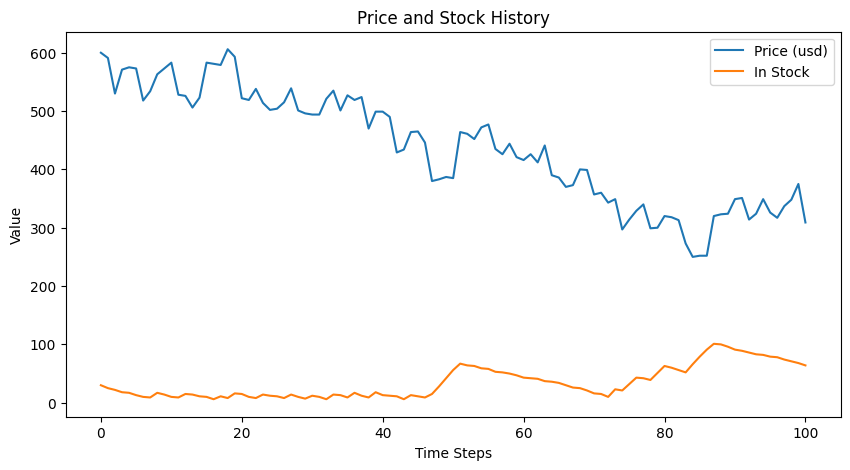

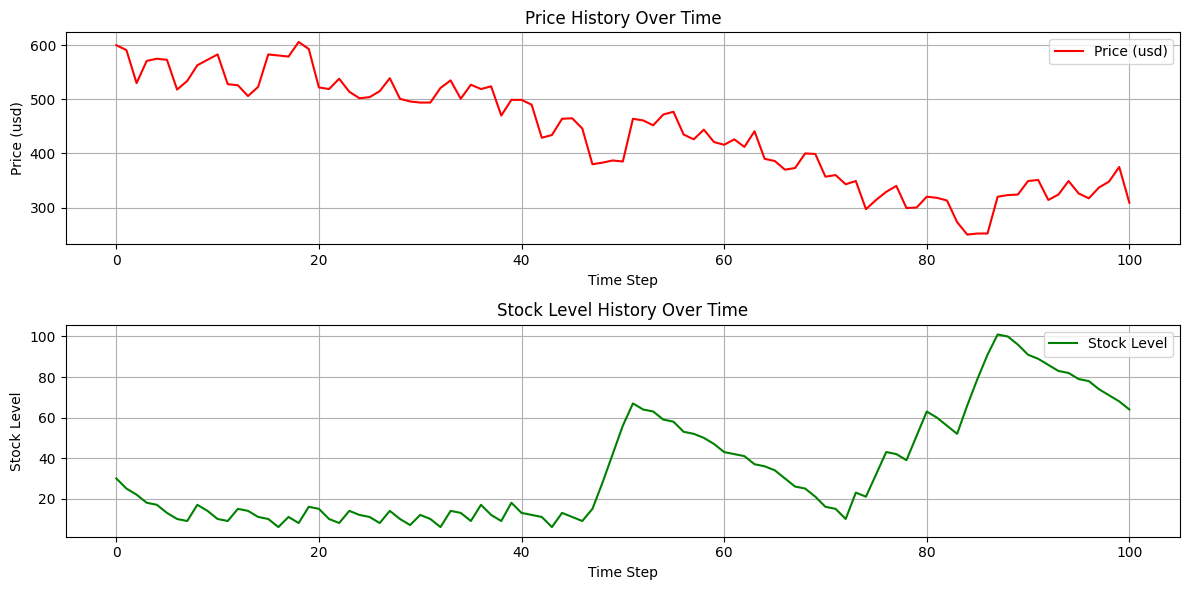

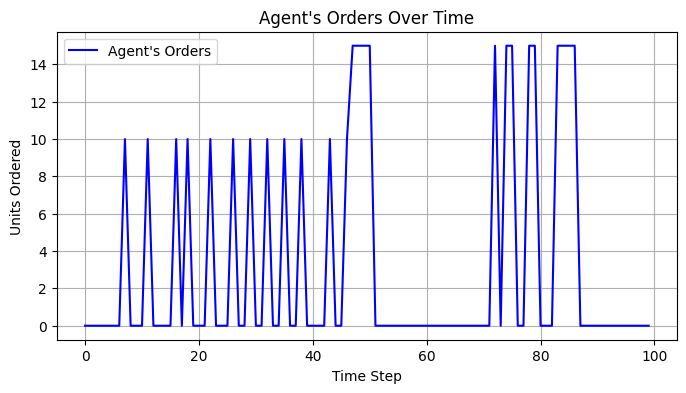

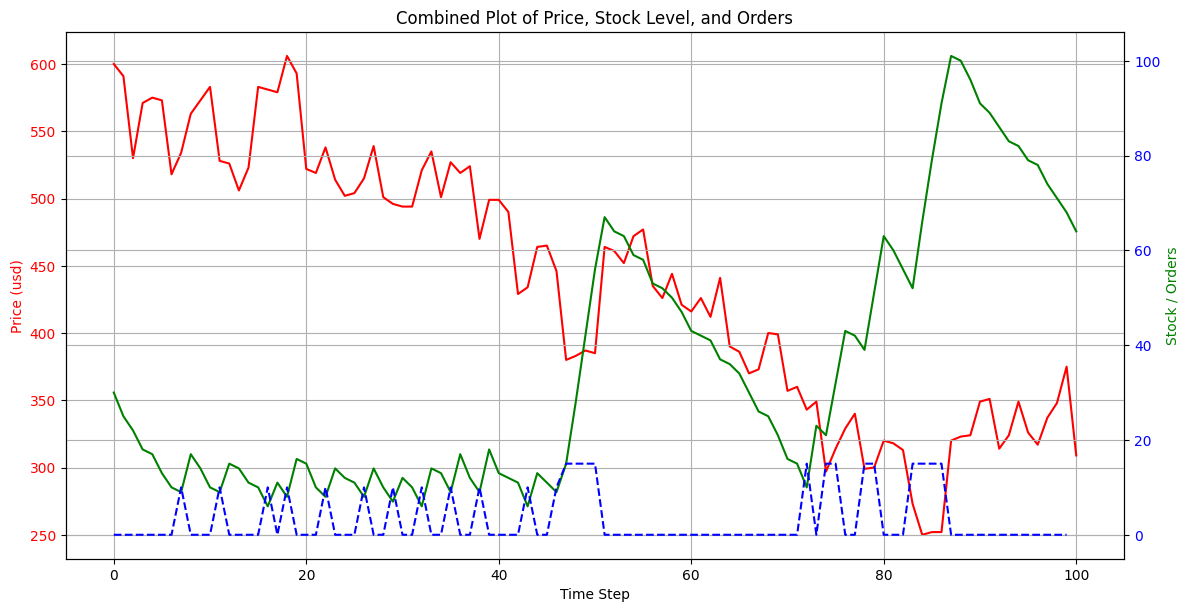

In [15]:
##Class to plot stock and price history
class PlotHistory:
    def __init__(self, agent, env):
        self.agent = agent
        self.env = env
        plt.ion()

    ##Plot the price and stock history
    def plot_environment_history(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.env.price_history, label="Price (usd)")
        plt.plot(self.env.stock_history, label="In Stock")
        plt.xlabel("Time Steps")
        plt.ylabel("Value")
        plt.title("Price and Stock History")
        plt.legend()
        plt.show()


    ##Plot history of price and stock levels
    def plot_env_hist(self):

        # Plot price history
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(self.env.price_history, label="Price (usd)", color='red')
        plt.xlabel("Time Step")
        plt.ylabel("Price (usd)")
        plt.title("Price History Over Time")
        plt.grid(True)
        plt.legend()

        # Plot stock history
        plt.subplot(2, 1, 2)
        plt.plot(self.env.stock_history, label="Stock Level", color='green')
        plt.xlabel("Time Step")
        plt.ylabel("Stock Level")
        plt.title("Stock Level History Over Time")
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

    ##Plot agent's orders history
    def plot_agent_hist(self):
        plt.figure(figsize=(8, 4))
        plt.plot(self.agent.buy_history, label="Agent's Orders", color='blue')
        plt.xlabel("Time Step")
        plt.ylabel("Units Ordered")
        plt.title("Agent's Orders Over Time")
        plt.grid(True)
        plt.legend()
        plt.show()


    ##Combined plot for price, stock, and agent's orders
    def combined_plot(self):
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot price history on the first axis
        ax1.set_xlabel('Time Step')
        ax1.set_ylabel('Price (usd)', color='red')
        ax1.plot(self.env.price_history, color='red', label="Price (usd)")
        ax1.tick_params(axis='y', labelcolor='red')

        # Create a second axis to plot stock and orders
        ax2 = ax1.twinx()
        ax2.set_ylabel('Stock / Orders', color='green')
        ax2.plot(self.env.stock_history, color='green', label="Stock Level")
        ax2.plot(self.agent.buy_history, color='blue', label="Orders", linestyle='--')
        ax2.tick_params(axis='y', labelcolor='blue')

        fig.tight_layout()  # Ensure everything fits without overlap
        plt.title("Combined Plot of Price, Stock Level, and Orders")
        ax1.grid(True)
        ax2.grid(True)
        plt.show()

# Initialize the environment, agent, and simulation
env =Environment()
agent = Agent()
sim = Simulation(agent, env, steps=100)

# Run the simulation
sim.run()

# Plot results
plot_history = PlotHistory(agent, env)
plot_history.plot_environment_history()
plot_history.plot_env_hist()
plot_history.plot_agent_hist()
plot_history.combined_plot()



